## Question 1? Question 1: Use yfinance to Extract Stock Data

In [2]:
import yfinance as yf
import pandas as pd

#### Getting data from yfinance Ticker of tesla


In [9]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="20y")

tesla_data.reset_index(inplace=True)
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [19]:
url = "https://stockanalysis.com/stocks/tsla/revenue/"
data = requests.get(url).text
soup = BeautifulSoup(data, "html5lib")
tesla_revenue = pd.DataFrame(columns=["Period Ended", "Revenue", "Change", "Growth"])

In [20]:
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    period = col[0].text
    revenue = col[1].text
    change = col[2].text
    growth = col[3].text
    new_row = pd.DataFrame({"Period Ended": [period], "Revenue": [revenue], "Change": [change], "Growth": [growth]})
    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

In [21]:
tesla_revenue.tail()

,Period Ended,Revenue,Change,Growth
12,"Dec 31, 2011",204.24M,87.50M,74.95%
13,"Dec 31, 2010",116.74M,4.80M,4.29%
14,"Dec 31, 2009",111.94M,97.20M,659.35%
15,"Dec 31, 2008",14.74M,14.67M,"20,094.52%"
16,"Dec 31, 2007",73.00K,-,-


## Question 3: Use yfinance to Extract Stock Data

In [6]:
import yfinance as yf
import pandas as pd

In [7]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="20y")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-02-17 00:00:00-05:00,1.449278,1.541016,1.449278,1.541016,2278400,0.0,0.0
1,2004-02-18 00:00:00-05:00,1.549432,1.565423,1.485468,1.519133,2777600,0.0,0.0
2,2004-02-19 00:00:00-05:00,1.552798,1.554481,1.515767,1.519975,2091200,0.0,0.0
3,2004-02-20 00:00:00-05:00,1.514925,1.519975,1.487993,1.514925,1675200,0.0,0.0
4,2004-02-23 00:00:00-05:00,1.514925,1.514925,1.489677,1.498934,2349600,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [10]:
url = "https://stockanalysis.com/stocks/gme/revenue/"
data = requests.get(url).text
soup = BeautifulSoup(data, "html5lib")
gme_revenue = pd.DataFrame(columns=["Period Ended", "Revenue", "Change", "Growth"])

In [13]:
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    period = col[0].text
    revenue = col[1].text
    change = col[2].text
    growth = col[3].text
    new_row = pd.DataFrame({"Period Ended": [period], "Revenue": [revenue], "Change": [change], "Growth": [growth]})
    gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

In [14]:
gme_revenue.tail()

,Period Ended,Revenue,Change,Growth
20,"Jan 31, 2003",1.35B,231.65M,20.66%
21,"Jan 31, 2002",1.12B,364.44M,48.16%
22,"Jan 31, 2001",756.70M,203.56M,36.80%
23,"Jan 31, 2000",553.14M,169.78M,44.29%
24,"Jan 31, 1998",383.36M,-,-


## Question 5: Plot Tesla Stock Graph

<Axes: xlabel='Date'>

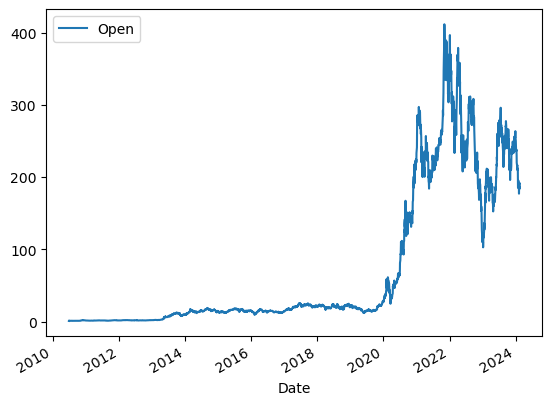

In [5]:
tesla_data.plot(x="Date", y="Open")

## Question 6: Plot GameStop Stock Graph

<Axes: xlabel='Date'>

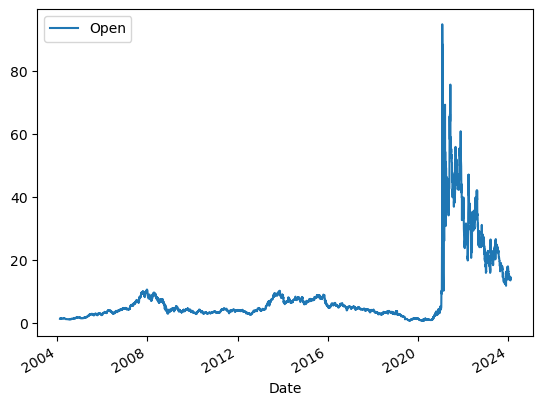

In [8]:
gme_data.plot(x="Date", y="Open")